<Figure size 2500x2500 with 0 Axes>

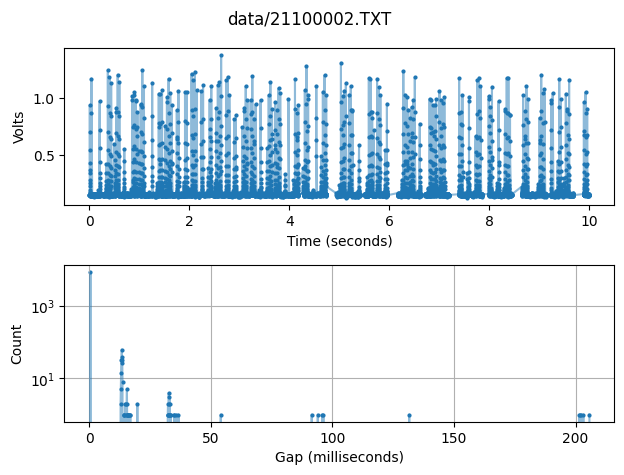

In [20]:
#This script determines the baseline for first second of FAST BOARD data ONLY

file1='MDA_data/21100001.TXT'
def quicklook(infile1):
    
   
    t1, k1 = np.loadtxt(infile1,skiprows=4,unpack=True,delimiter=',')
    s = 4.0
    n = 10
    v1 = k1*(3.3/4096)/s
    
    t_micro1 = t1/1e6
    #print('Time for first file of this run in microseconds is ', t_micro1)
    #print()
    #print(len(t_micro1))
    
    #I sliced the array, then skimmed through the first 1,000 time stamps to see what element shifted from 1336.0000x to 1337., 
    #...and it's ~642. I am sure there is a more elegant way to do that, but I am but a simple space traveler.
    #Anyhow, this is how I decided upon N = 643.
    # Looking at the .txt file, it looks to be aound the 1800 line that you see anything close to 300 V 
    #So let me know if I should adjust N accordingly?
    
    N = 643
 
    # using list slicing
    # Get first N elements from list
    #res = t_micro1[:N]
    # print result
    #print("The first N elements of list are : " + str(res))
   
    
    #sorted_index_array1 = np.argsort(v1)  
    #sorted_array1 = v1[sorted_index_array1] 
    rslt1 = v1[N : ] 
    print("The baseline voltages at the beginning of the run are ", infile1, "are".format(n), rslt1)
    print() 
    x1 = mean(rslt1) 
    print('The mean of the first 643 voltages for run ', infile1, ', between time 1336 and 1337 s is ', x1)
    #print()
    #print('The voltage jump after looks like ', v1[:N])
        

    
quicklook(file1)

In [10]:
print(10e6)

10000000.0
